# CMKE 136 Capstone Project Fall 2018

## Import Packages

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from datetime import datetime
import scipy as sp
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Initial Analysis

In [152]:
#Import data and create dataframe
df_all=pd.read_csv('all.csv')

In [153]:
#Display dataframe
df_all.head(n=10)

,Income,Age,Workclass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Country
0,<=50K,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,<=50K,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,<=50K,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,<=50K,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,<=50K,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,<=50K,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,<=50K,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,>50K,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,>50K,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,>50K,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [154]:
#Get information about each column including data types
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
Income           48842 non-null object
Age              48842 non-null int64
Workclass        48842 non-null object
Fnlwgt           48842 non-null int64
Education        48842 non-null object
EducationNum     48842 non-null int64
MaritalStatus    48842 non-null object
Occupation       48842 non-null object
Relationship     48842 non-null object
Race             48842 non-null object
Sex              48842 non-null object
CapitalGain      48842 non-null int64
CapitalLoss      48842 non-null int64
HoursPerWeek     48842 non-null int64
Country          48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [155]:
#Replace the class attribute with numerice values: <=50K with 0 and >50K with 1
replacements = {
  ' <=50K':0,
  ' >50K':1,
  ' <=50K.':0,
  ' >50K.':1,  
}
df_all['Income'].replace(replacements, inplace=True)

In [156]:
#Replace ? (missing values) with NaN
df_all2=df_all.replace(" ?",np.NaN)

In [157]:
#Display the new dataframe
df_all2.head(n=10)

,Income,Age,Workclass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Country
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,0,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,0,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,1,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,1,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,1,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [158]:
#Count the number of records for each attribute
df_all2.count()

Income           48842
Age              48842
Workclass        46043
Fnlwgt           48842
Education        48842
EducationNum     48842
MaritalStatus    48842
Occupation       46033
Relationship     48842
Race             48842
Sex              48842
CapitalGain      48842
CapitalLoss      48842
HoursPerWeek     48842
Country          47985
dtype: int64

### Univariate Analysis

In [159]:
#Create a dataframe with only the numeric variables
numeric_all = pd.DataFrame(df_all2,columns=['Age','Fnlwgt','EducationNum','CapitalGain','CapitalLoss','HoursPerWeek'])

In [160]:
#Create a five number summary of the numeric attributes
numeric_all.describe()

,Age,Fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Kurtosis -0.18426874062387633


NormaltestResult(statistic=2297.738804196464, pvalue=0.0)

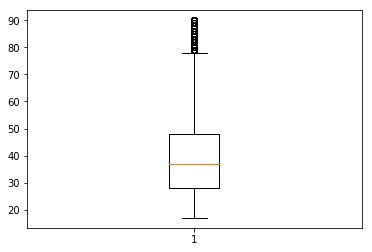

In [161]:
#Boxplot of numeric values- Age
plt.boxplot(df_all2['Age'])
print('Kurtosis',df_all2['Age'].kurtosis())
sp.stats.normaltest(df_all2.Age)

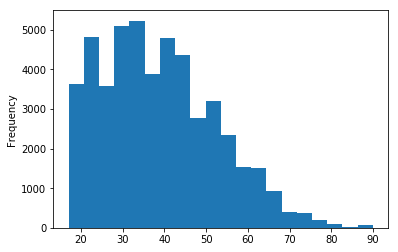

In [162]:
#Histogram of Age
df_all2['Age'].plot.hist(bins=20)

Kurtosis 6.057848212464708


NormaltestResult(statistic=15801.45152255299, pvalue=0.0)

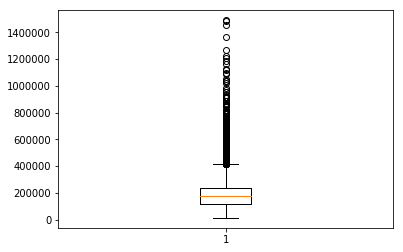

In [163]:
#Boxplot of numeric values- Fnlwgt
plt.boxplot(df_all2['Fnlwgt'])
print('Kurtosis',df_all2['Fnlwgt'].kurtosis())
sp.stats.normaltest(df_all2.Fnlwgt)

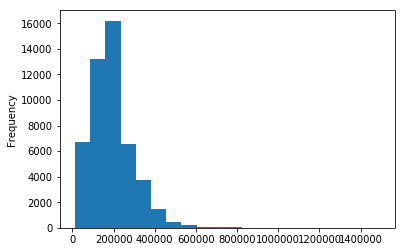

In [164]:
#Histogram of Fnlwgt
df_all2['Fnlwgt'].plot.hist(bins=20)

Kurtosis 0.6257452727879236


NormaltestResult(statistic=1250.5685648452036, pvalue=2.7700430782097358e-272)

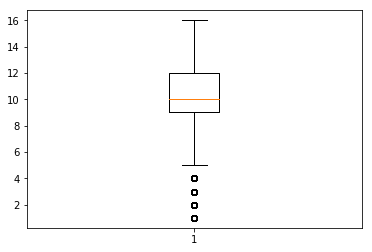

In [165]:
#Boxplot of numeric values- EducationNum
plt.boxplot(df_all2['EducationNum'])
print('Kurtosis',df_all2['EducationNum'].kurtosis())
sp.stats.normaltest(df_all2.EducationNum)

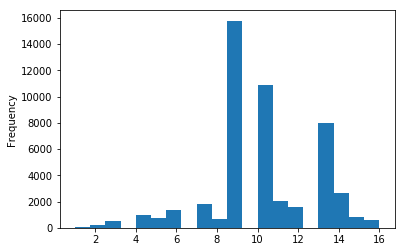

In [166]:
#Histogram of EducationNum
df_all2['EducationNum'].plot.hist(bins=20)

Kurtosis 152.69309629828723


NormaltestResult(statistic=82380.70801497858, pvalue=0.0)

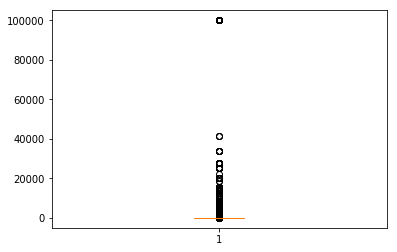

In [167]:
#Boxplot of numeric values- CapitalGain
plt.boxplot(df_all2['CapitalGain'])
print('Kurtosis',df_all2['CapitalGain'].kurtosis())
sp.stats.normaltest(df_all2.CapitalGain)

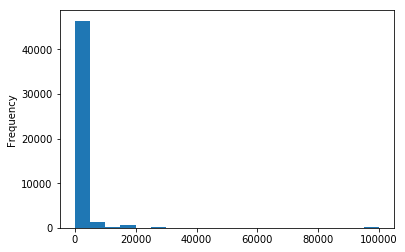

In [168]:
#Histogram of CapitalGain
df_all2['CapitalGain'].plot.hist(bins=20)

Kurtosis 20.014345954651432


NormaltestResult(statistic=43751.63711473689, pvalue=0.0)

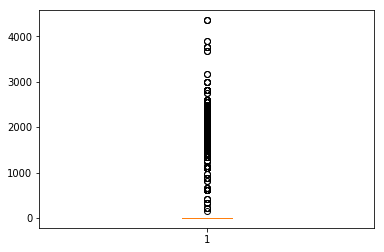

In [169]:
#Boxplot of numeric values- CapitalLoss
plt.boxplot(df_all2['CapitalLoss'])
print('Kurtosis',df_all2['CapitalLoss'].kurtosis())
sp.stats.normaltest(df_all2.CapitalLoss)

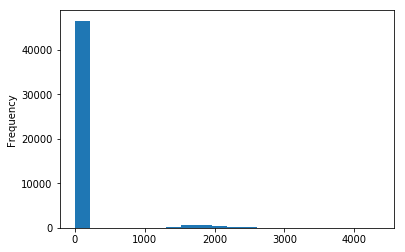

In [170]:
#Histogram of CapitalLoss
df_all2['CapitalLoss'].plot.hist(bins=20)

Kurtosis 2.951059089844297


NormaltestResult(statistic=3839.253694712544, pvalue=0.0)

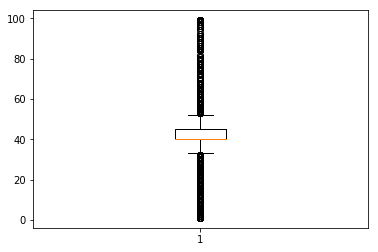

In [171]:
#Boxplot of numeric values- HoursPerWeek
plt.boxplot(df_all2['HoursPerWeek'])
print('Kurtosis',df_all2['HoursPerWeek'].kurtosis())
sp.stats.normaltest(df_all2.HoursPerWeek)

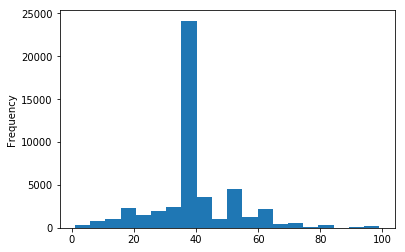

In [172]:
#Histogram of HoursPerWeek
df_all2['HoursPerWeek'].plot.hist(bins=20)

Ratio of income >50K:  0.23928176569346055
Ratio of income <=50K:  0.7607182343065395


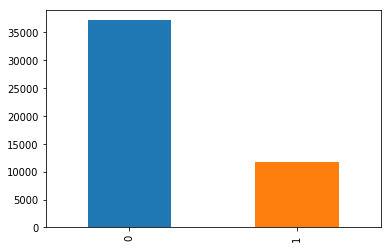

In [173]:
#Histogram of class attribute Income
df_all2['Income'].value_counts().plot(kind='bar')
print('Ratio of income >50K: ', df_all2['Income'].sum()/df_all2['Income'].count())
print('Ratio of income <=50K: ', 1-df_all2['Income'].sum()/df_all2['Income'].count())

In [174]:
#As seen from the Income histogram, the data is unbalanced in favour of income <50K

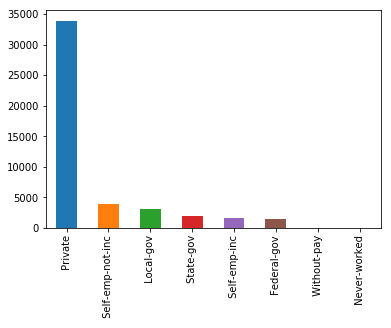

In [175]:
#Histogram of categorical variables - Workclass
df_all2['Workclass'].value_counts().plot(kind='bar')

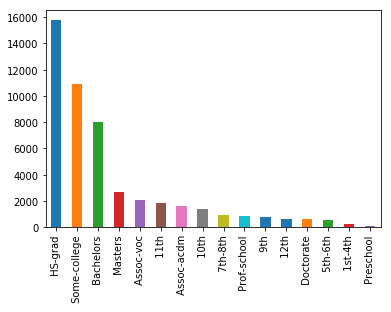

In [176]:
#Histogram of categorical variables - Education
df_all2['Education'].value_counts().plot(kind='bar')

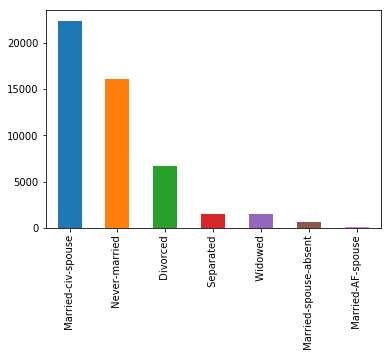

In [177]:
#Histogram of categorical variables - Marital-Status
df_all2['MaritalStatus'].value_counts().plot(kind='bar')

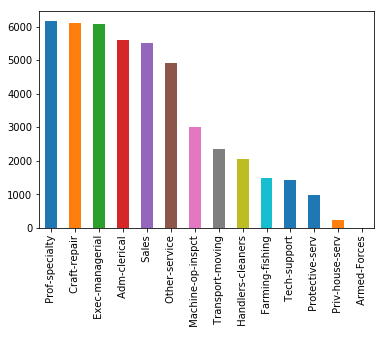

In [178]:
#Histogram of categorical variables - Occupation
df_all2['Occupation'].value_counts().plot(kind='bar')

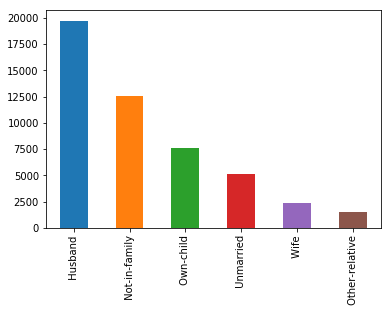

In [179]:
#Histogram of categorical variables - Relationship
df_all2['Relationship'].value_counts().plot(kind='bar')

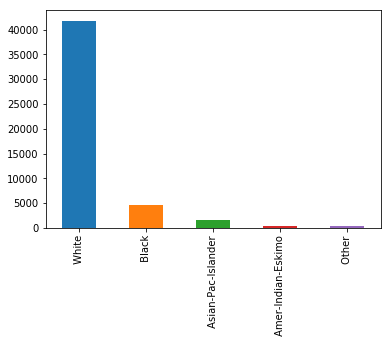

In [180]:
#Histogram of categorical variables - Race
df_all2['Race'].value_counts().plot(kind='bar')

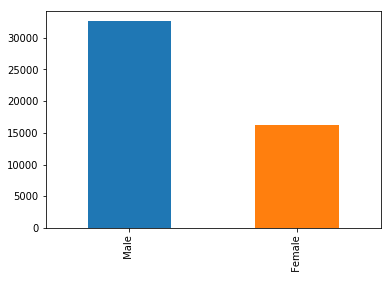

In [181]:
#Histogram of categorical variables - Sex
df_all2['Sex'].value_counts().plot(kind='bar')

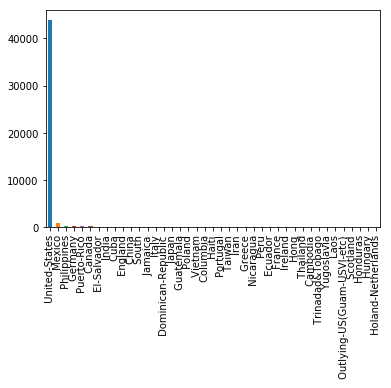

In [182]:
#Histogram of categorical variables - Native Country
df_all2['Country'].value_counts().plot(kind='bar')

### Bivariate Analysis

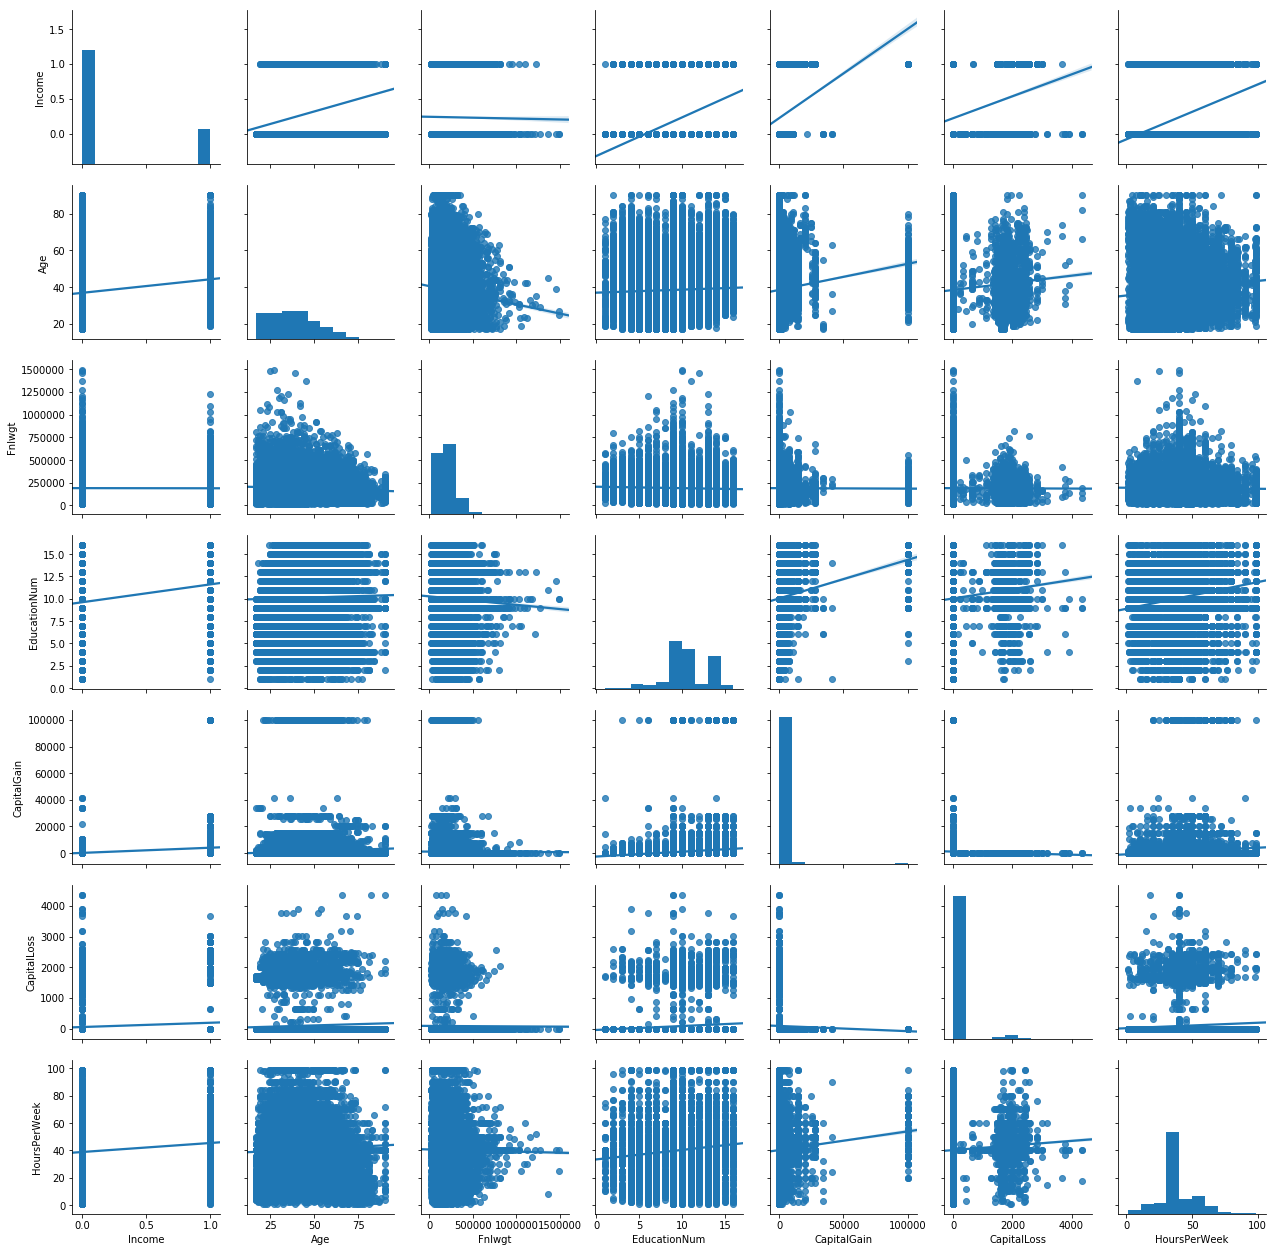

In [183]:
#Graph the distribution of each of the variables and plot each of the variables against the class attribute
g = sns.pairplot(df_all2, kind="reg")

In [184]:
#Create correlation matrix of the numeric variables
corr = df_all2.corr(method='pearson')
corr.style.background_gradient().set_precision(2)

,Income,Age,Fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
Income,1,0.23,-0.0063,0.33,0.22,0.15,0.23
Age,0.23,1,-0.077,0.031,0.077,0.057,0.072
Fnlwgt,-0.0063,-0.077,1,-0.039,-0.0037,-0.0044,-0.014
EducationNum,0.33,0.031,-0.039,1,0.13,0.081,0.14
CapitalGain,0.22,0.077,-0.0037,0.13,1,-0.031,0.082
CapitalLoss,0.15,0.057,-0.0044,0.081,-0.031,1,0.054
HoursPerWeek,0.23,0.072,-0.014,0.14,0.082,0.054,1


In [185]:
#There is a weak correlation between Income & Age, Income & Education-Num, Income & Capital-Gain and Income & Hours-Per-Week

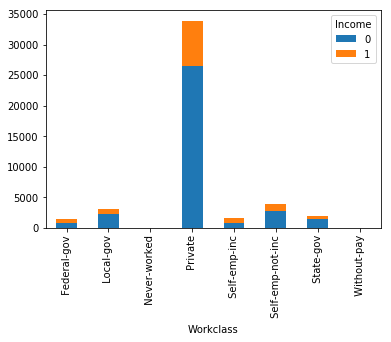

In [186]:
#Plotting each of the independent variables against the class attribute: Workclass vs Income
df_all2.groupby(['Workclass', 'Income']).size().unstack().plot(kind='bar', stacked=True)

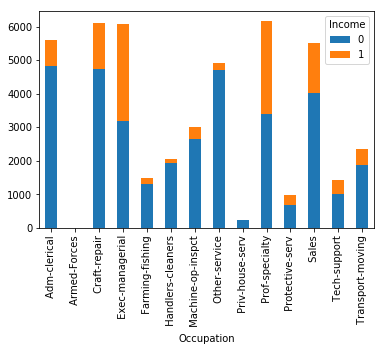

In [187]:
#Occupation vs Income
df_all2.groupby(['Occupation', 'Income']).size().unstack().plot(kind='bar', stacked=True)

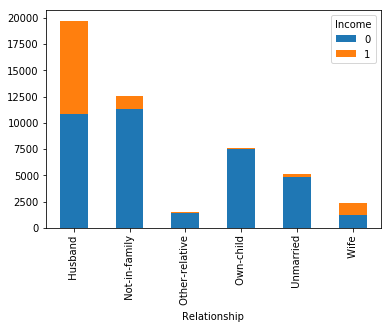

In [188]:
#Relationship vs Income
df_all2.groupby(['Relationship', 'Income']).size().unstack().plot(kind='bar', stacked=True)

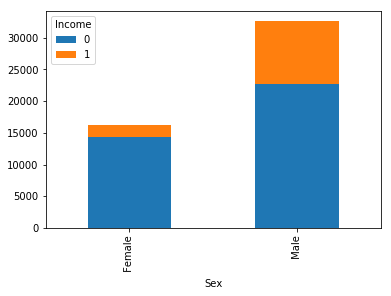

In [189]:
#Sex vs Income
df_all2.groupby(['Sex', 'Income']).size().unstack().plot(kind='bar', stacked=True)

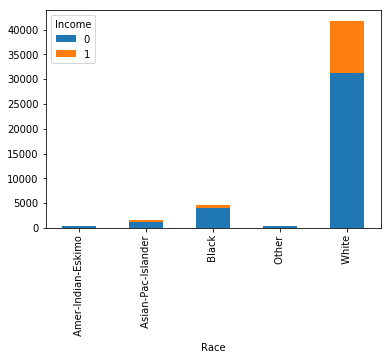

In [190]:
#Race vs Income
df_all2.groupby(['Race', 'Income']).size().unstack().plot(kind='bar', stacked=True)

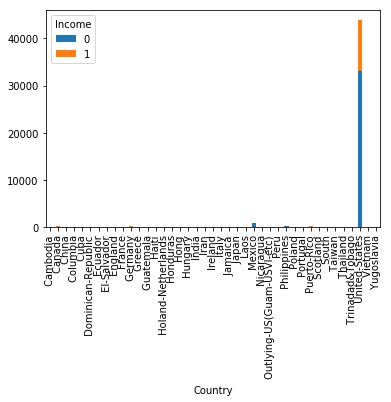

In [191]:
#Country vs Income
df_all2.groupby(['Country', 'Income']).size().unstack().plot(kind='bar', stacked=True)

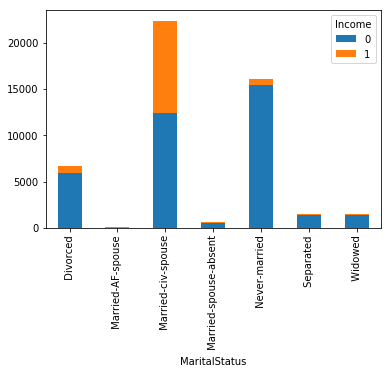

In [192]:
#Marital-Status vs Income
df_all2.groupby(['MaritalStatus', 'Income']).size().unstack().plot(kind='bar', stacked=True)

### Further Preprocessing

In [193]:
#Count the number of missing values for each attribute
df_all2.isnull().sum()

Income              0
Age                 0
Workclass        2799
Fnlwgt              0
Education           0
EducationNum        0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
Country           857
dtype: int64

In [194]:
#Identify duplicate rows
df_all2[df_all2.duplicated(keep='first')]

,Income,Age,Workclass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Country
4881,0,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico
5104,0,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States
9171,0,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States
11631,0,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States
13084,0,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala
15059,0,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico
17040,0,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
18555,0,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN
18698,0,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States
21318,0,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States


In [195]:
#Count number of duplicate rows/values
df_all2[df_all2.duplicated(keep='first')].count()

Income           52
Age              52
Workclass        48
Fnlwgt           52
Education        52
EducationNum     52
MaritalStatus    52
Occupation       48
Relationship     52
Race             52
Sex              52
CapitalGain      52
CapitalLoss      52
HoursPerWeek     52
Country          51
dtype: int64

In [196]:
#There are 52 duplicate rows in the dataset

In [197]:
#Drop duplicated rows
df_all3=df_all2.drop_duplicates(keep='first', inplace=False)

In [198]:
#Check that all duplicate rows have been removed
df_all3[df_all3.duplicated(keep='first')].count()

Income           0
Age              0
Workclass        0
Fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
Country          0
dtype: int64

In [199]:
#Checking how many missing values are left once duplicated values are removed
df_all3.isnull().sum()

Income              0
Age                 0
Workclass        2795
Fnlwgt              0
Education           0
EducationNum        0
MaritalStatus       0
Occupation       2805
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
Country           856
dtype: int64

In [200]:
#Drop rows where 'Occupation' is missing
df_all4=df_all3.dropna(axis=0, how='any', thresh=None, subset=['Occupation'], inplace=False)

In [201]:
#Checking how many missing values are left once rows missing 'Occupation' are dropped
df_all4.isnull().sum()

Income             0
Age                0
Workclass          0
Fnlwgt             0
Education          0
EducationNum       0
MaritalStatus      0
Occupation         0
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
Country          810
dtype: int64

In [202]:
#Removing rows where 'Occupation' is missing, removes all rows where 'Workclass' is missing

In [203]:
#Replace missing 'Country' values with the mode 'United-States
df_all5=df_all4.fillna('United States')

In [204]:
#Check that all missing values have been removed
df_all5.isnull().sum()

Income           0
Age              0
Workclass        0
Fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
Country          0
dtype: int64

In [205]:
#Standardize the numeric columns as the are all non-normal
df_all6=df_all5.copy()
column_names_to_standardize = ['Age','Fnlwgt','EducationNum','CapitalGain','CapitalLoss','HoursPerWeek']
x = df_all6[column_names_to_standardize].values
scaler= StandardScaler()
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_standardize, index = df_all6.index)
df_all6[column_names_to_standardize] = df_temp
df_all6

C:\Users\mvu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mvu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Income,Age,Workclass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Country
0,0,0.032959,State-gov,-1.064527,Bachelors,1.119880,Never-married,Adm-clerical,Not-in-family,White,Male,0.139399,-0.219036,-0.079330,United-States
1,0,0.866185,Self-emp-not-inc,-1.009592,Bachelors,1.119880,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146904,-0.219036,-2.327216,United-States
2,0,-0.042788,Private,0.244919,HS-grad,-0.440821,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.146904,-0.219036,-0.079330,United-States
3,0,1.093428,Private,0.425746,11th,-1.221172,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.146904,-0.219036,-0.079330,United-States
4,0,-0.800266,Private,1.408688,Bachelors,1.119880,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.146904,-0.219036,-0.079330,Cuba
5,0,-0.118536,Private,0.898419,Masters,1.510056,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.146904,-0.219036,-0.079330,United-States
6,0,0.790437,Private,-0.280822,9th,-2.001523,Married-spouse-absent,Other-service,Not-in-family,Black,Female,-0.146904,-0.219036,-2.077451,Jamaica
7,1,1.017680,Self-emp-not-inc,0.188002,HS-grad,-0.440821,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146904,-0.219036,0.336945,United-States
8,1,-0.573023,Private,-1.365369,Masters,1.510056,Never-married,Prof-specialty,Not-in-family,White,Female,1.707873,-0.219036,0.753220,United-States
9,1,0.260203,Private,-0.287818,Bachelors,1.119880,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.535007,-0.219036,-0.079330,United-States


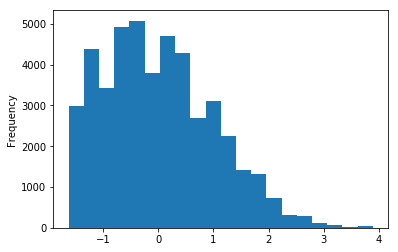

In [206]:
df_all6['Age'].plot.hist(bins=20)

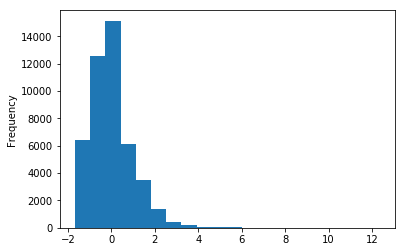

In [207]:
df_all6['Fnlwgt'].plot.hist(bins=20)

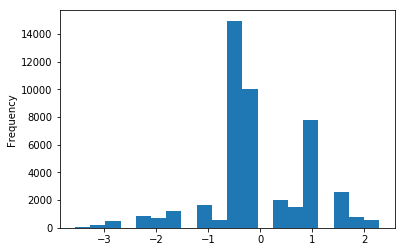

In [208]:
df_all6['EducationNum'].plot.hist(bins=20)

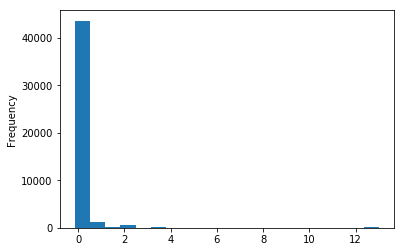

In [209]:
df_all6['CapitalGain'].plot.hist(bins=20)

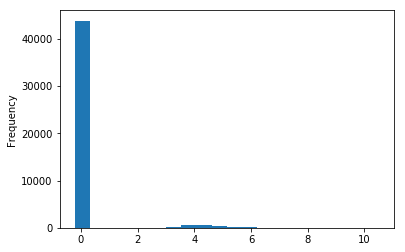

In [210]:
df_all6['CapitalLoss'].plot.hist(bins=20)

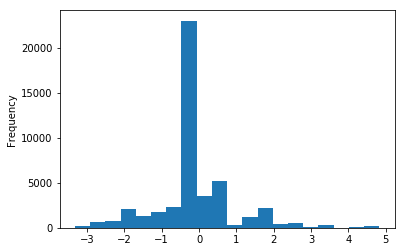

In [211]:
df_all6['HoursPerWeek'].plot.hist(bins=20)

## Exploratory Analysis

In [212]:
#Drop the Education column as Education-Num is the exact numeric version of this attribute
df_all7=df_all6.drop('Education',axis=1)

In [213]:
#Drop the Fnlwgt column as it does not add much predictive value. Fnlwgt = of people the census takers believe that observation represents
df_all8=df_all7.drop('Fnlwgt',axis=1)

In [214]:
#Applying one-hot encoding the get dummy variables for each of the categorical variables
df_copy=df_all8.copy()

df_one_hot=pd.get_dummies(df_copy, columns=["Workclass","MaritalStatus","Occupation","Relationship","Race","Sex","Country"], prefix=["Workclass","MaritalStatus","Occupation","Relationship","Race","Sex","Country"])


In [215]:
#Examening the new dataframe and the total number of columns
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45985 entries, 0 to 48841
Data columns (total 89 columns):
Income                                  45985 non-null int64
Age                                     45985 non-null float64
EducationNum                            45985 non-null float64
CapitalGain                             45985 non-null float64
CapitalLoss                             45985 non-null float64
HoursPerWeek                            45985 non-null float64
Workclass_ Federal-gov                  45985 non-null uint8
Workclass_ Local-gov                    45985 non-null uint8
Workclass_ Private                      45985 non-null uint8
Workclass_ Self-emp-inc                 45985 non-null uint8
Workclass_ Self-emp-not-inc             45985 non-null uint8
Workclass_ State-gov                    45985 non-null uint8
Workclass_ Without-pay                  45985 non-null uint8
MaritalStatus_ Divorced                 45985 non-null uint8
MaritalStatus_ Married-AF-s

### Feature Selection

In [216]:
#With the help of the decision tree classifier using Entropy index to rank each features based on importance
array = df_one_hot.values
X=array[:,1:]
Y=array[:,0]
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

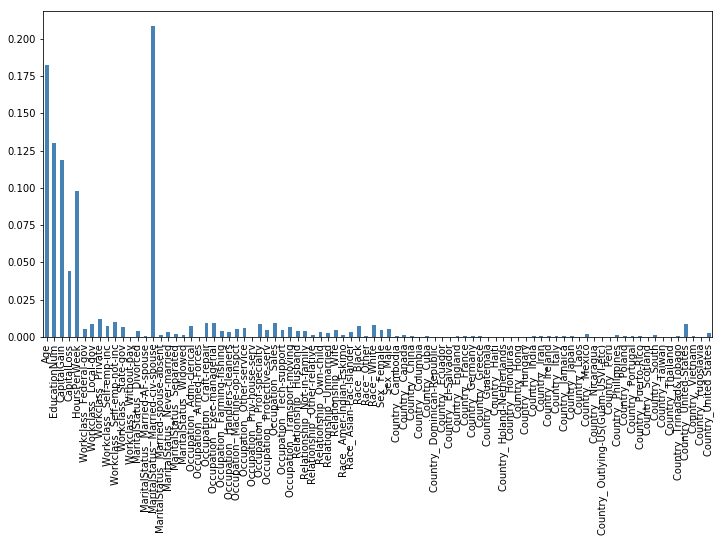

In [217]:
#Plotting all the features and their importance
pd.Series(model.feature_importances_, index=df_one_hot.columns[1:]).plot.bar(color='steelblue', figsize=(12, 6))

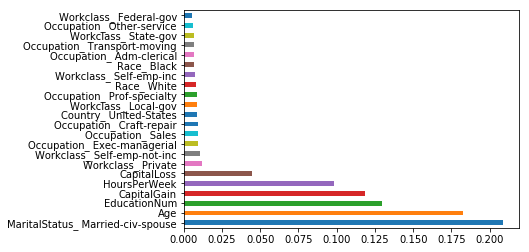

In [218]:
#To increase readability, plotting the top 22 most important features
feat_importances =pd.Series(model.feature_importances_, index=df_one_hot.columns[1:])
feat_importances.nlargest(22).plot(kind='barh')

In [219]:
#Listing all the features and their importance in descending order
pd.Series(model.feature_importances_, index=df_one_hot.columns[1:]).sort_values(ascending=False).head(n=30)

MaritalStatus_ Married-civ-spouse    0.208557
Age                                  0.182727
EducationNum                         0.129803
CapitalGain                          0.118700
HoursPerWeek                         0.097934
CapitalLoss                          0.044477
Workclass_ Private                   0.012179
Workclass_ Self-emp-not-inc          0.010254
Occupation_ Exec-managerial          0.009563
Occupation_ Sales                    0.009416
Occupation_ Craft-repair             0.009062
Country_ United-States               0.008904
Workclass_ Local-gov                 0.008879
Occupation_ Prof-specialty           0.008658
Race_ White                          0.008207
Workclass_ Self-emp-inc              0.007265
Race_ Black                          0.006965
Occupation_ Adm-clerical             0.006919
Occupation_ Transport-moving         0.006784
Workclass_ State-gov                 0.006343
Occupation_ Other-service            0.005934
Workclass_ Federal-gov            

In [220]:
#Calculate the mean of the feature importances
pd.Series(model.feature_importances_, index=df_one_hot.columns[1:]).mean()

0.011363636363636366

In [221]:
#Calculate the median of the feature importances
pd.Series(model.feature_importances_, index=df_one_hot.columns[1:]).median()

0.0012873359332779572

In [222]:
#Calculate the 75th percentile of the feature importances
np.percentile(pd.Series(model.feature_importances_, index=df_one_hot.columns[1:]),75)

0.005042834204745012

In [223]:
#Create a new dataframe with features where the feature importance are all in the 75th percentile
df_clean=df_one_hot[['Income','MaritalStatus_ Married-civ-spouse','Age','EducationNum','CapitalGain','HoursPerWeek','CapitalLoss','Workclass_ Private','Occupation_ Exec-managerial','Workclass_ Self-emp-not-inc','Occupation_ Prof-specialty','Occupation_ Craft-repair','Country_ United-States','Occupation_ Sales','Race_ White','Workclass_ Local-gov','Workclass_ Self-emp-inc','Race_ Black','Occupation_ Adm-clerical','Occupation_ Transport-moving','Occupation_ Other-service','Workclass_ State-gov','Sex_ Female']]

In [224]:
#Checking that the desired features were dropped from the dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45985 entries, 0 to 48841
Data columns (total 23 columns):
Income                               45985 non-null int64
MaritalStatus_ Married-civ-spouse    45985 non-null uint8
Age                                  45985 non-null float64
EducationNum                         45985 non-null float64
CapitalGain                          45985 non-null float64
HoursPerWeek                         45985 non-null float64
CapitalLoss                          45985 non-null float64
Workclass_ Private                   45985 non-null uint8
Occupation_ Exec-managerial          45985 non-null uint8
Workclass_ Self-emp-not-inc          45985 non-null uint8
Occupation_ Prof-specialty           45985 non-null uint8
Occupation_ Craft-repair             45985 non-null uint8
Country_ United-States               45985 non-null uint8
Occupation_ Sales                    45985 non-null uint8
Race_ White                          45985 non-null uint8
Workclass_ 

## Data Modelling

In [225]:
#Split the data into two; one dataframe for the class attribute and one dataframe for the rest of the attributes
dataset=df_clean.values
X=dataset[:,1:]
y=dataset[:,0]

### Classification Approach A: Splitting between train and test using an 80:20 split

In [226]:
#Split to dataset into train and test set to prepare for modelling
#80% of the data will be used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [227]:
#Classifier 1a) Decision Tree
start_time = datetime.now()

classifier_dt = DecisionTreeClassifier(criterion='entropy')  

#Train algorithm on training data
classifier_dt.fit(X_train, y_train)

#Make predictions on train data
y_predict_train = classifier_dt.predict(X_train)

#Make predictions on test data
y_pred = classifier_dt.predict(X_test)

print('Train Accuracy Score: ', accuracy_score(y_train, y_predict_train))
print('Test Accuracy Score: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.9681146025878004
Test Accuracy Score:  0.8179841252582364
[[6122  781]
 [ 893 1401]]
             precision    recall  f1-score   support

        0.0       0.87      0.89      0.88      6903
        1.0       0.64      0.61      0.63      2294

avg / total       0.82      0.82      0.82      9197

Duration: 0:00:00.170922


In [255]:
#Classifier 2a) KNN
start_time = datetime.now()

classifier_knn = KNeighborsClassifier(n_neighbors=9)
classifier_knn.fit(X_train, y_train)
y_predict_train = classifier_knn.predict(X_train)
y_pred = classifier_knn.predict(X_test)
print('Train Accuracy Score: ', accuracy_score(y_train, y_predict_train))
print('Test Accuracy Score: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.8684353593563119
Test Accuracy Score:  0.8404914646080244
[[6340  563]
 [ 904 1390]]
             precision    recall  f1-score   support

        0.0       0.88      0.92      0.90      6903
        1.0       0.71      0.61      0.65      2294

avg / total       0.83      0.84      0.84      9197

Duration: 0:00:29.790380


In [148]:
#Classifier 3a) Naive Bayes
start_time = datetime.now()

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_predict_train = classifier_nb.predict(X_train)
y_pred = classifier_nb.predict(X_test)
print('Train Accuracy Score: ', accuracy_score(y_train, y_predict_train))
print('Test Accuracy Score: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.8157823203218441
Test Accuracy Score:  0.810481678808307
[[6205  771]
 [ 972 1249]]
             precision    recall  f1-score   support

        0.0       0.86      0.89      0.88      6976
        1.0       0.62      0.56      0.59      2221

avg / total       0.81      0.81      0.81      9197

Duration: 0:00:00.079219


In [149]:
#Classifier 4a) SVM
start_time = datetime.now()

classifier_svm = SVC(kernel='sigmoid') 
classifier_svm.fit(X_train, y_train)
y_predict_train = classifier_svm.predict(X_train)
y_pred = classifier_svm.predict(X_test)
print('Train Accuracy Score: ', accuracy_score(y_train, y_predict_train))
print('Test Accuracy Score: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.7768565836685876
Test Accuracy Score:  0.7711210177231707
[[5932 1044]
 [1061 1160]]
             precision    recall  f1-score   support

        0.0       0.85      0.85      0.85      6976
        1.0       0.53      0.52      0.52      2221

avg / total       0.77      0.77      0.77      9197

Duration: 0:00:40.642186


In [258]:
#Ensemble Method a - Random Forrest Classifier
start_time = datetime.now()

num_trees = 60
max_features = 22
classifier_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
classifier_rf.fit(X_train, y_train)
y_predict_train = classifier_rf.predict(X_train)
y_pred = classifier_rf.predict(X_test)
print('Train Accuracy Score: ', accuracy_score(y_train, y_predict_train))
print('Test Accuracy Score: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.9679786887028379
Test Accuracy Score:  0.8394041535283244
[[6290  613]
 [ 864 1430]]
             precision    recall  f1-score   support

        0.0       0.88      0.91      0.89      6903
        1.0       0.70      0.62      0.66      2294

avg / total       0.83      0.84      0.84      9197

Duration: 0:00:05.243796


### Classification Approach B: Splitting between train and test using three fold cross-validation

In [228]:
#Split the data using three fold cross-validation
seed=7
threefold= model_selection.KFold(n_splits=3, random_state=seed)

In [229]:
#Classifier 1b) Decision Tree
start_time = datetime.now()

model_dt=tree.DecisionTreeClassifier(criterion='entropy')
results_dt = model_selection.cross_val_score(model_dt, X, y, cv=threefold)
print('Accuracy: ',results_dt.mean())


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8202022098988401
Duration: 0:00:00.348097


In [281]:
#Classifier 2b) KNN
start_time = datetime.now()

model_knn = KNeighborsClassifier(n_neighbors=9)
results_knn = model_selection.cross_val_score(model_knn, X, y, cv=threefold)
print('Accuracy: ',results_knn.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8383603508171253
Duration: 0:00:27.206496


In [83]:
#Classifier 3b) Naive Bayes
start_time = datetime.now()

model_nb = GaussianNB()
results_nb= model_selection.cross_val_score(model_nb, X, y, cv=threefold)
print('Accuracy: {}',results_nb.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy: {} 0.8148961597252704
Duration: 0:00:00.143875


In [84]:
#Classifier 4b) SVM
start_time = datetime.now()

model_svm=SVC(kernel='sigmoid')
results_svm = model_selection.cross_val_score(model_svm, X, y, cv=threefold)
print('Accuracy: ',results_svm.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.7773187426845193
Duration: 0:01:15.716601


In [85]:
#Ensemble Method b - Random Forest Classifier
start_time = datetime.now()

model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results_rf = model_selection.cross_val_score(model_rf, X, y, cv=threefold)
print('Accuracy: ',results_rf.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8416223110139186
Duration: 0:00:12.898249


### Classification Approach C: Splitting between train and test using five fold cross-validation

In [86]:
#Split the data using three fold cross-validation
seed=7
fivefold= model_selection.KFold(n_splits=5, random_state=seed)

In [230]:
#Classifier 1c) Decision Tree
start_time = datetime.now()

model_dt=tree.DecisionTreeClassifier(criterion='entropy')
results_dt = model_selection.cross_val_score(model_dt, X, y, cv=fivefold)
print('Accuracy: ',results_dt.mean())


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8201587474176362
Duration: 0:00:00.665859


In [282]:
#Classifier 2c) KNN
start_time = datetime.now()

model_knn = KNeighborsClassifier(n_neighbors=9)
results_knn = model_selection.cross_val_score(model_knn, X, y, cv=fivefold)
print('Accuracy: ',results_knn.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8391866913123845
Duration: 0:00:36.660188


In [89]:
#Classifier 3c) Naive Bayes
start_time = datetime.now()

model_nb = GaussianNB()
results_nb= model_selection.cross_val_score(model_nb, X, y, cv=fivefold)
print('Accuracy: ',results_nb.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8147004457975427
Duration: 0:00:00.228382


In [90]:
#Classifier 4c) SVM
start_time = datetime.now()

model_svm=SVC(kernel='sigmoid')
results_svm = model_selection.cross_val_score(model_svm, X, y, cv=fivefold)
print('Accuracy: ',results_svm.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.7757747091442863
Duration: 0:03:25.984310


In [91]:
#Ensemble Method c - Random Forest Classifier
start_time = datetime.now()

model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results_rf = model_selection.cross_val_score(model_rf, X, y, cv=fivefold)
print('Accuracy: ',results_rf.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8405567032728063
Duration: 0:00:29.739544


### Classification Approach D: Splitting between train and test using seven fold cross-validation

In [231]:
#Split the data using three fold cross-validation
seed=7
sevenfold= model_selection.KFold(n_splits=7, random_state=seed)

In [232]:
#Classifier 1d) Decision Tree
start_time = datetime.now()

model_dt=tree.DecisionTreeClassifier(criterion='entropy')
results_dt = model_selection.cross_val_score(model_dt, X, y, cv=sevenfold)
print('Accuracy: ', results_dt.mean())


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8202891936338991
Duration: 0:00:00.973045


In [283]:
#Classifier 2d) KNN
start_time = datetime.now()

model_knn = KNeighborsClassifier(n_neighbors=9)
results_knn = model_selection.cross_val_score(model_knn, X, y, cv=sevenfold)
print('Accuracy: ', results_knn.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8404479870149881
Duration: 0:00:46.984555


In [95]:
#Classifier 3d) Naive Bayes
start_time = datetime.now()

model_nb = GaussianNB()
results_nb= model_selection.cross_val_score(model_nb, X, y, cv=sevenfold)
print('Accuracy: ', results_nb.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8148961940173045
Duration: 0:00:00.341111


In [96]:
#Classifier 4d) SVM
start_time = datetime.now()

model_svm=SVC(kernel='sigmoid')
results_svm = model_selection.cross_val_score(model_svm, X, y, cv=sevenfold)
print('Accuracy: ',results_svm.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.7755357242573035
Duration: 0:05:18.565579


In [97]:
#Ensemble Method d - Random Forest Classifier
start_time = datetime.now()

model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results_rf = model_selection.cross_val_score(model_rf, X, y, cv=sevenfold)
print('Accuracy: ', results_rf.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8403392710382578
Duration: 0:00:52.015312


### Classification Approach E: Splitting between train and test using ten fold cross-validation

In [233]:
#Split the data using three fold cross-validation
seed=7
tenfold= model_selection.KFold(n_splits=10, random_state=seed)

In [234]:
#Classifier 1e) Decision Tree
start_time = datetime.now()

model_dt=tree.DecisionTreeClassifier(criterion='entropy')
results_dt = model_selection.cross_val_score(model_dt, X, y, cv=tenfold)
print('Accuracy: ', results_dt.mean())


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8210718832630087
Duration: 0:00:01.469614


In [284]:
#Classifier 2e) KNN
start_time = datetime.now()

model_knn = KNeighborsClassifier(n_neighbors=9)
results_knn = model_selection.cross_val_score(model_knn, X, y, cv=tenfold)
print('Accuracy: ', results_knn.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8402087050903987
Duration: 0:01:00.014256


In [101]:
#Classifier 3e) Naive Bayes
start_time = datetime.now()

model_nb = GaussianNB()
results_nb= model_selection.cross_val_score(model_nb, X, y, cv=tenfold)
print('Accurcy: ', results_nb.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accurcy:  0.8150049781989219
Duration: 0:00:00.432435


In [102]:
#Classifier 4e) SVM
start_time = datetime.now()

model_svm=SVC(kernel='sigmoid')
results_svm = model_selection.cross_val_score(model_svm, X, y, cv=tenfold)
print('Accuracy: ', results_svm.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.775753040664229
Duration: 0:08:19.549336


In [103]:
#Ensemble Method e - Random Forest Classifier
start_time = datetime.now()

model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results_rf = model_selection.cross_val_score(model_rf, X, y, cv=tenfold)
print('Accuracy: ', results_rf.mean())

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Accuracy:  0.8406651605806091
Duration: 0:01:09.707794


### Classification Approach F: Balancing the dataset by undersampling the majority class and runninng the classifiers using ten fold cross-validation. Sampling without replacement

#### Creating a balanced dataframe by undersampling the majority class (income >50K) without replacement

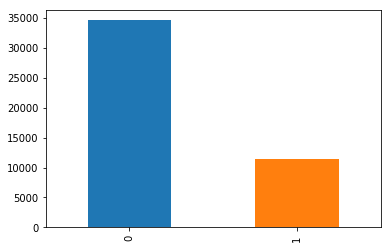

In [238]:
df_clean['Income'].value_counts().plot(kind='bar')

In [239]:
print('Ratio of income >50K: ', df_clean['Income'].sum()/df_clean['Income'].count())
print('Ratio of income <=50K: ', 1-df_clean['Income'].sum()/df_clean['Income'].count())

Ratio of income >50K:  0.24825486571708166
Ratio of income <=50K:  0.7517451342829183


In [240]:
#Find number of records where income >50K
low_income = len(df_clean[df_clean['Income'] == 1])
low_income

11416

In [241]:
#Get indices of income <=50K
low_income_indices = df_clean[df_clean.Income == 0].index

In [242]:
#Random sample low income indices
random_indices = np.random.choice(low_income_indices,low_income, replace=False)

In [243]:
#Get indices of income <=50K
high_income_indices = df_clean[df_clean.Income == 1].index

In [244]:
#Concatenate high income indices with low income ones
under_sample_indices = np.concatenate([high_income_indices,random_indices])

In [245]:
#Get balanced dataframe
under_sample = df_clean.loc[under_sample_indices]

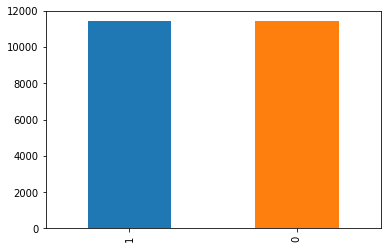

In [246]:
under_sample['Income'].value_counts().plot(kind='bar')

### Modelling

In [259]:
#Split the data into two; one dataframe for the class attribute and one dataframe for the rest of the attributes
dataset=under_sample.values
A=dataset[:,1:]
b=dataset[:,0]

In [260]:
#Split to dataset into train and test set to prepare for modelling
#80% of the data will be used for training
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.20)

In [262]:
#Classifier 1f) Decision Tree

start_time = datetime.now()
classifier_dt = DecisionTreeClassifier(criterion='entropy')  
classifier_dt.fit(A_train, b_train)
b_predict_train = classifier_dt.predict(A_train)
b_pred = classifier_dt.predict(A_test)

print('Train Accuracy Score: ', accuracy_score(b_train, b_predict_train))
print('Test Accuracy Score: ', accuracy_score(b_test, b_pred))
print(confusion_matrix(b_test, b_pred))  
print(classification_report(b_test, b_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.9702710101286613
Test Accuracy Score:  0.7707466608276768
[[1764  478]
 [ 569 1756]]
             precision    recall  f1-score   support

        0.0       0.76      0.79      0.77      2242
        1.0       0.79      0.76      0.77      2325

avg / total       0.77      0.77      0.77      4567

Duration: 0:00:00.096696


In [264]:
#Classifier 2f) KNN
start_time = datetime.now()

classifier_knn = KNeighborsClassifier(n_neighbors=9)
classifier_knn.fit(A_train, b_train)
b_predict_train = classifier_knn.predict(A_train)
b_pred = classifier_knn.predict(A_test)
print('Train Accuracy Score: ', accuracy_score(b_train, b_predict_train))
print('Test Accuracy Score: ', accuracy_score(b_test, b_pred))
print(confusion_matrix(b_test, b_pred))  
print(classification_report(b_test, b_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.8418833835203942
Test Accuracy Score:  0.8009634333260346
[[1758  484]
 [ 425 1900]]
             precision    recall  f1-score   support

        0.0       0.81      0.78      0.79      2242
        1.0       0.80      0.82      0.81      2325

avg / total       0.80      0.80      0.80      4567

Duration: 0:00:07.572675


In [265]:
#Classifier 3f) Naive Bayes
start_time = datetime.now()

classifier_nb = GaussianNB()
classifier_nb.fit(A_train, b_train)
b_predict_train = classifier_nb.predict(A_train)
b_pred = classifier_nb.predict(A_test)
print('Train Accuracy Score: ', accuracy_score(b_train, b_predict_train))
print('Test Accuracy Score: ', accuracy_score(b_test, b_pred))
print(confusion_matrix(b_test, b_pred))  
print(classification_report(b_test, b_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.7553791404325212
Test Accuracy Score:  0.7545434639807314
[[1939  303]
 [ 818 1507]]
             precision    recall  f1-score   support

        0.0       0.70      0.86      0.78      2242
        1.0       0.83      0.65      0.73      2325

avg / total       0.77      0.75      0.75      4567

Duration: 0:00:00.046597


In [266]:
#Classifier 4f) SVM
start_time = datetime.now()

classifier_svm = SVC(kernel='sigmoid') 
classifier_svm.fit(A_train, b_train)
b_predict_train = classifier_svm.predict(A_train)
b_pred = classifier_svm.predict(A_test)
print('Train Accuracy Score: ', accuracy_score(b_train, b_predict_train))
print('Test Accuracy Score: ', accuracy_score(b_test, b_pred))
print(confusion_matrix(b_test, b_pred))  
print(classification_report(b_test, b_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.7513824254037778
Test Accuracy Score:  0.7416246989270856
[[1649  593]
 [ 587 1738]]
             precision    recall  f1-score   support

        0.0       0.74      0.74      0.74      2242
        1.0       0.75      0.75      0.75      2325

avg / total       0.74      0.74      0.74      4567

Duration: 0:00:13.976155


In [267]:
#Ensemble Method f - Random Forrest Classifier
start_time = datetime.now()

num_trees = 60
max_features = 22
classifier_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
classifier_rf.fit(A_train, b_train)
b_predict_train = classifier_rf.predict(A_train)
b_pred = classifier_rf.predict(A_test)
print('Train Accuracy Score: ', accuracy_score(b_train, b_predict_train))
print('Test Accuracy Score: ', accuracy_score(b_test, b_pred))
print(confusion_matrix(b_test, b_pred))  
print(classification_report(b_test, b_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.9700520120448947
Test Accuracy Score:  0.7989927742500548
[[1782  460]
 [ 458 1867]]
             precision    recall  f1-score   support

        0.0       0.80      0.79      0.80      2242
        1.0       0.80      0.80      0.80      2325

avg / total       0.80      0.80      0.80      4567

Duration: 0:00:02.306462


### Classification Approach G: Balancing the dataset by undersampling the majority class and runninng the classifiers using ten fold cross-validation. Sampling with replacement

#### Creating a balanced dataframe by undersampling the majority class (income >50K) with replacement

In [235]:
#Find number of records where income >50K
low_income2 = len(df_clean[df_clean['Income'] == 1])

#Get indices of income <=50K
low_income_indices2 = df_clean[df_clean.Income == 0].index

#Random sample low income indices
random_indices2 = np.random.choice(low_income_indices2,low_income2, replace=True)

#Get indices of income <=50K
high_income_indices2 = df_clean[df_clean.Income == 1].index

#Concatenate high income indices with low income ones
under_sample_indices2 = np.concatenate([high_income_indices2,random_indices2])

#Get balanced dataframe
under_sample2 = df_clean.loc[under_sample_indices2]

#### Modelling

In [268]:
#Split the data into two; one dataframe for the class attribute and one dataframe for the rest of the attributes
dataset=under_sample2.values
C=dataset[:,1:]
d=dataset[:,0]

In [269]:
#Split to dataset into train and test set to prepare for modelling
#80% of the data will be used for training
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.20)

In [270]:
#Classifier 1g) Decision Tree

start_time = datetime.now()
classifier_dt = DecisionTreeClassifier(criterion='entropy')  
classifier_dt.fit(C_train, d_train)
d_predict_train = classifier_dt.predict(C_train)
d_pred = classifier_dt.predict(C_test)

print('Train Accuracy Score: ', accuracy_score(d_train, d_predict_train))
print('Test Accuracy Score: ', accuracy_score(d_test, d_pred))
print(confusion_matrix(d_test, d_pred))  
print(classification_report(d_test, d_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.9714207500684369
Test Accuracy Score:  0.7937376833807751
[[1805  416]
 [ 526 1820]]
             precision    recall  f1-score   support

        0.0       0.77      0.81      0.79      2221
        1.0       0.81      0.78      0.79      2346

avg / total       0.79      0.79      0.79      4567

Duration: 0:00:00.082344


In [271]:
#Classifier 2g) KNN
start_time = datetime.now()

classifier_knn = KNeighborsClassifier(n_neighbors=9)
classifier_knn.fit(C_train, d_train)
d_predict_train = classifier_knn.predict(C_train)
d_pred = classifier_knn.predict(C_test)
print('Train Accuracy Score: ', accuracy_score(d_train, d_predict_train))
print('Test Accuracy Score: ', accuracy_score(d_test, d_pred))
print(confusion_matrix(d_test, d_pred))  
print(classification_report(d_test, d_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.8431426225020531
Test Accuracy Score:  0.8057805999562075
[[1723  498]
 [ 389 1957]]
             precision    recall  f1-score   support

        0.0       0.82      0.78      0.80      2221
        1.0       0.80      0.83      0.82      2346

avg / total       0.81      0.81      0.81      4567

Duration: 0:00:06.809021


In [272]:
#Classifier 3g) Naive Bayes
start_time = datetime.now()

classifier_nb = GaussianNB()
classifier_nb.fit(C_train, d_train)
d_predict_train = classifier_nb.predict(C_train)
d_pred = classifier_nb.predict(C_test)
print('Train Accuracy Score: ', accuracy_score(d_train, d_predict_train))
print('Test Accuracy Score: ', accuracy_score(d_test, d_pred))
print(confusion_matrix(d_test, d_pred))  
print(classification_report(d_test, d_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.7489186969614016
Test Accuracy Score:  0.7429384716444055
[[1920  301]
 [ 873 1473]]
             precision    recall  f1-score   support

        0.0       0.69      0.86      0.77      2221
        1.0       0.83      0.63      0.72      2346

avg / total       0.76      0.74      0.74      4567

Duration: 0:00:00.044289


In [273]:
#Classifier 4g) SVM
start_time = datetime.now()

classifier_svm = SVC(kernel='sigmoid') 
classifier_svm.fit(C_train, d_train)
d_predict_train = classifier_svm.predict(C_train)
d_pred = classifier_svm.predict(C_test)
print('Train Accuracy Score: ', accuracy_score(d_train, d_predict_train))
print('Test Accuracy Score: ', accuracy_score(d_test, d_pred))
print(confusion_matrix(d_test, d_pred))  
print(classification_report(d_test, d_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.754174650971804
Test Accuracy Score:  0.7506021458287716
[[1659  562]
 [ 577 1769]]
             precision    recall  f1-score   support

        0.0       0.74      0.75      0.74      2221
        1.0       0.76      0.75      0.76      2346

avg / total       0.75      0.75      0.75      4567

Duration: 0:00:13.626221


In [277]:
#Ensemble Method g - Random Forrest Classifier
start_time = datetime.now()

num_trees = 60
max_features = 22
classifier_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
classifier_rf.fit(C_train, d_train)
d_predict_train = classifier_rf.predict(C_train)
d_pred = classifier_rf.predict(C_test)
print('Train Accuracy Score: ', accuracy_score(d_train, d_predict_train))
print('Test Accuracy Score: ', accuracy_score(d_test, d_pred))
print(confusion_matrix(d_test, d_pred))  
print(classification_report(d_test, d_pred))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Accuracy Score:  0.971037503421845
Test Accuracy Score:  0.8211079483249398
[[1815  406]
 [ 411 1935]]
             precision    recall  f1-score   support

        0.0       0.82      0.82      0.82      2221
        1.0       0.83      0.82      0.83      2346

avg / total       0.82      0.82      0.82      4567

Duration: 0:00:02.888939


In [278]:
#Using Random Forest w/balanced dataset w/replacement to determine most useful features for predicting income
num_trees = 60
max_features = 22
classifier_rf = RandomForestClassifier(criterion='entropy',n_estimators=num_trees, max_features=max_features)
classifier_rf.fit(C, d)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=22, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

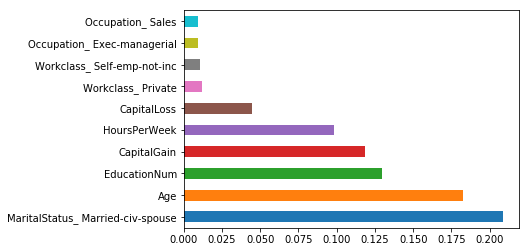

In [280]:
#To increase readability, plotting the top 10 most important features
feat_importances =pd.Series(model.feature_importances_, index=df_one_hot.columns[1:])
feat_importances.nlargest(10).plot(kind='barh')